In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datin=pd.read_csv("C:/Users/pc/Documents/Self_Learning/[DesireCourse.Net] Udemy - Time Series Analysis in Python 2020/03 Introduction to Time Series in Python/013 IndexE8.csv")

In [3]:
datin.date=pd.to_datetime(datin.date,dayfirst=True)

In [4]:
datin.set_index("date",inplace=True)


In [5]:
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt

In [6]:
from math import sqrt

In [10]:
df_comp=datin.copy()
df_comp.index=pd.to_datetime(df_comp.index,dayfirst=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method="ffill")

In [12]:
df_comp['market_value']=df_comp.ftse

In [14]:
df_comp['returns_FTSE']=df_comp.ftse.pct_change(1).mul(100)

In [16]:
from  statsmodels.tsa.arima_model import ARMA

MA(1) for returns

In [17]:
model_ret_ma_1=ARMA(df_comp.returns_FTSE[1:],order=(0,1))
result_ret_ma_1=model_ret_ma_1.fit()
result_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           returns_FTSE   No. Observations:                 6276
Model:                     ARMA(0, 1)   Log Likelihood               -9597.598
Method:                       css-mle   S.D. of innovations              1.117
Date:                Tue, 08 Sep 2020   AIC                          19201.195
Time:                        18:53:25   BIC                          19221.429
Sample:                    01-10-1994   HQIC                         19208.206
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0190      0.014      1.374      0.169      -0.008       0.046
ma.L1.returns_FTSE    -0.0196      0.013     -1.467      0.142      -0.046       0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           51.1299           +0.0000j           51.1299            0.0000
-----------------------------------------------------------------------------
"""

In [18]:
def LLR(mod1,mod2,DF=1):
    l1=mod1.fit().llf
    l2=mod2.fit().llf
    LR=(2*(l2-l1))
    p=chi2.sf(LR,DF).round(3)
    return p

In [21]:
from scipy.stats.distributions import chi2

Higher-Lag MA Model for Returns

In [22]:
model_ret_ma_2=ARMA(df_comp.returns_FTSE[1:],order=(0,2))
result_ret_ma_2=model_ret_ma_2.fit()
print(result_ret_ma_2.summary())
print("\nLLR test p-value",str(LLR(model_ret_ma_1,model_ret_ma_2)))

                              ARMA Model Results                              
Dep. Variable:           returns_FTSE   No. Observations:                 6276
Model:                     ARMA(0, 2)   Log Likelihood               -9589.839
Method:                       css-mle   S.D. of innovations              1.115
Date:                Tue, 08 Sep 2020   AIC                          19187.677
Time:                        19:00:57   BIC                          19214.655
Sample:                    01-10-1994   HQIC                         19197.025
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0190      0.013      1.457      0.145      -0.007       0.045
ma.L1.returns_FTSE    -0.0254      0.013     -2.000      0.045      -0.050      -0.001
ma.L2.returns_FTSE  

In [23]:
model_ret_ma_3=ARMA(df_comp.returns_FTSE[1:],order=(0,3))
result_ret_ma_3=model_ret_ma_3.fit()
print(result_ret_ma_3.summary())
print("\nLLR test p-value",str(LLR(model_ret_ma_2,model_ret_ma_3)))

                              ARMA Model Results                              
Dep. Variable:           returns_FTSE   No. Observations:                 6276
Model:                     ARMA(0, 3)   Log Likelihood               -9573.494
Method:                       css-mle   S.D. of innovations              1.112
Date:                Tue, 08 Sep 2020   AIC                          19156.988
Time:                        19:11:02   BIC                          19190.710
Sample:                    01-10-1994   HQIC                         19168.672
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0190      0.012      1.587      0.113      -0.004       0.043
ma.L1.returns_FTSE    -0.0175      0.013     -1.381      0.167      -0.042       0.007
ma.L2.returns_FTSE  

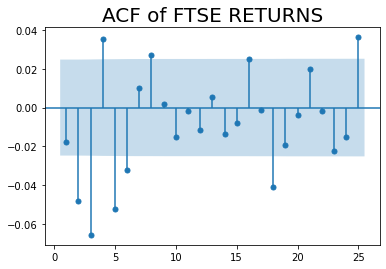

In [26]:
sgt.plot_acf(df_comp.returns_FTSE[1:],lags=25,zero=False)
plt.title('ACF of FTSE RETURNS', size=20)
plt.show()


In [28]:
model_ret_ma_8=ARMA(df_comp.returns_FTSE[1:],order=(0,8))
result_ret_ma_8=model_ret_ma_8.fit()
print(result_ret_ma_8.summary())
print("\nLLR test p-value",str(LLR(model_ret_ma_1,model_ret_ma_8,DF=8)))

                              ARMA Model Results                              
Dep. Variable:           returns_FTSE   No. Observations:                 6276
Model:                     ARMA(0, 8)   Log Likelihood               -9557.611
Method:                       css-mle   S.D. of innovations              1.110
Date:                Tue, 08 Sep 2020   AIC                          19135.223
Time:                        19:14:48   BIC                          19202.668
Sample:                    01-10-1994   HQIC                         19158.591
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0190      0.012      1.609      0.108      -0.004       0.042
ma.L1.returns_FTSE    -0.0197      0.013     -1.564      0.118      -0.044       0.005
ma.L2.returns_FTSE  

Residuals for Returns

In [29]:
df_comp['returns_FTS_res_8']=result_ret_ma_8.resid[1:]

In [32]:
round(df_comp['returns_FTS_res_8'].mean(),3)

-0.0

In [33]:
round(df_comp['returns_FTS_res_8'].var(),3)

1.231

In [34]:
round(sqrt(df_comp['returns_FTS_res_8'].var()),3)

1.11

<AxesSubplot:xlabel='date'>

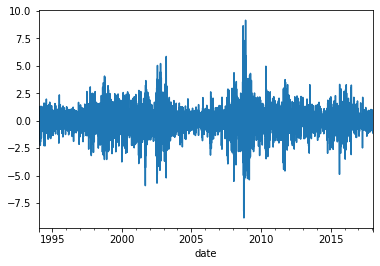

In [35]:
df_comp.returns_FTS_res_8[1:].plot()

In [36]:
sts.adfuller(df_comp.returns_FTS_res_8[2:])

(-79.20645865580062,
 0.0,
 0,
 6274,
 {'1%': -3.4313927123850956,
  '5%': -2.8620007867175294,
  '10%': -2.5670152737839897},
 19024.102543547742)

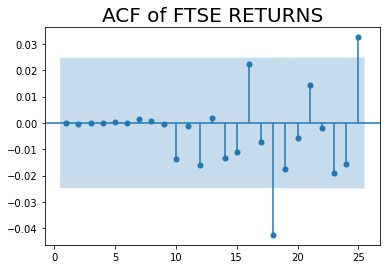

In [37]:
sgt.plot_acf(df_comp.returns_FTS_res_8[2:],lags=25,zero=False)
plt.title('ACF of FTSE RETURNS', size=20)
plt.show()

In [38]:
#Normlaized Returns

In [41]:
bench_ret=df_comp.returns_FTSE.iloc[1]
df_comp['norm_ret']=df_comp.returns_FTSE.div(bench_ret).mul(100)

In [45]:
df_comp['norm_ret']

date
1994-01-07           NaN
1994-01-10    100.000000
1994-01-11    497.260711
1994-01-12    780.443046
1994-01-13    227.285567
                 ...    
2018-01-23   -135.530649
2018-01-24    729.597320
2018-01-25    230.338698
2018-01-26   -416.456135
2018-01-29    -49.882539
Freq: B, Name: norm_ret, Length: 6277, dtype: float64

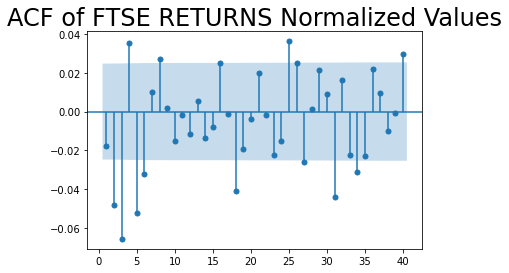

In [47]:
sgt.plot_acf(df_comp.norm_ret[1:],lags=40,zero=False)
plt.title('ACF of FTSE RETURNS Normalized Values', size=24)
plt.show()

In [48]:
#MA 8 for 
model_ret_nor_ma_8=ARMA(df_comp.norm_ret[1:],order=(0,8))
result_ret_nor_ma_8=model_ret_nor_ma_8.fit()
print(result_ret_nor_ma_8.summary())

                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                     ARMA(0, 8)   Log Likelihood              -50091.563
Method:                       css-mle   S.D. of innovations            708.043
Date:                Tue, 08 Sep 2020   AIC                         100203.127
Time:                        20:01:46   BIC                         100270.571
Sample:                    01-10-1994   HQIC                        100226.495
                         - 01-29-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.1199      7.547     -1.606      0.108     -26.911       2.672
ma.L1.norm_ret    -0.0197      0.013     -1.563      0.118      -0.044       0.005
ma.L2.norm_ret    -0.0491      0.013

In [49]:
df_comp['res_norm_ret_8_ma']=result_ret_nor_ma_8.resid[1:]

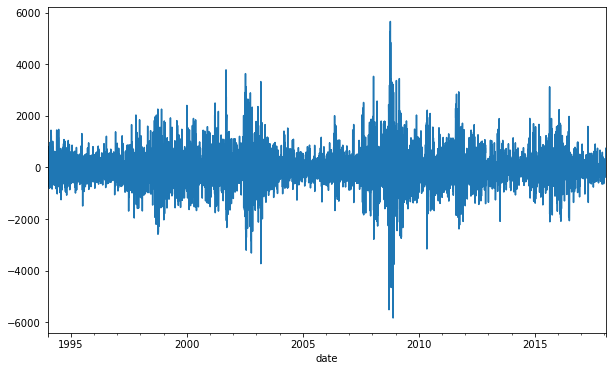

In [51]:
df_comp.res_norm_ret_8_ma[1:].plot(figsize=(10,6))
plt.show()

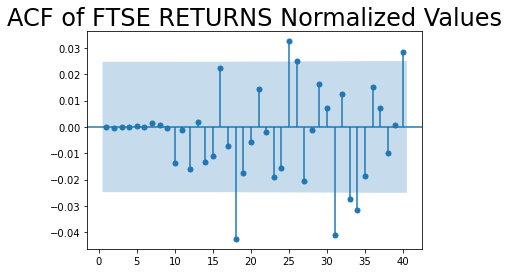

In [53]:
sgt.plot_acf(df_comp.res_norm_ret_8_ma[2:],lags=40,zero=False)
plt.title('ACF of FTSE RETURNS Normalized Values', size=24)
plt.show()

In [56]:
#MA models for prices
model_ma=ARMA(df_comp.market_value[1:],order=(0,1))
result_ma=model_ma.fit()
print(result_ma.summary())

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6276
Model:                     ARMA(0, 1)   Log Likelihood              -48989.238
Method:                       css-mle   S.D. of innovations            593.868
Date:                Tue, 08 Sep 2020   AIC                          97984.477
Time:                        20:31:47   BIC                          98004.710
Sample:                    01-10-1994   HQIC                         97991.487
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5424.0598     14.721    368.460      0.000    5395.207    5452.912
ma.L1.market_value     0.9639      0.002    411.390      0.000       0.959       0.968
                    